In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fp=(eval(input('请输入旗点纵坐标（从0开始）：')), eval(input('请输入旗点横坐标（从0开始）：')))

mat=pd.read_excel(r'目录/地图.xlsx', header=None)
sl=np.shape(mat)[0]

mat

请输入旗点纵坐标（从0开始）：2
请输入旗点横坐标（从0开始）：1


,0,1,2,3,4,5,6,7,8,9,10
0,r,r,y,y,g,b,r,o,r,b,b
1,b,p,y,p,o,o,p,o,p,g,o
2,g,y,y,g,r,b,o,r,r,o,g
3,b,b,b,b,p,b,o,r,o,b,y
4,p,b,b,g,r,b,g,g,g,b,y
5,p,p,p,g,r,y,b,r,p,b,b
6,b,y,b,r,g,p,b,b,p,o,g
7,y,g,b,r,r,r,y,y,r,r,g
8,b,o,g,y,r,y,p,p,p,p,p
9,r,o,o,r,g,y,p,b,r,r,p


In [3]:
G=nx.Graph()

# 添加节点，为其设置颜色属性
for i in range(sl):
    for j in range(sl):
        G.add_node((i,j), color=mat.iloc[i,j])

# 添加边，设置边权
for i in range(sl):
    for j in range(sl):
        if j+1<=sl-1:
            G.add_edge((i,j), (i,j+1), weight=1)
        if i+1<=sl-1:
            G.add_edge((i,j), (i+1,j), weight=1)

# print(G._node)
# print(pd.DataFrame(G.edges(data=True)))

In [4]:
def merge(G, fp):
    G1=G.copy()
    for node in list(G1._node):
        if node!=fp:
            for neighbor in G1[node]:
                if (G1._node[node])['color']==(G1._node[neighbor])['color']:
                    target_neighbor=neighbor
                    other_neighbors=list(set(G1[node])-{target_neighbor})
                        
                    for curr_neighbor in other_neighbors:
                        G1.add_edge(curr_neighbor, target_neighbor, weight=1)
                            
                    G1.remove_node(node)
                    break
                    
    return G1

In [5]:
G=merge(G, fp)

# print(G._node)
# print(pd.DataFrame(G.edges(data=True)))

In [6]:
def calc_TWD(G, fp, dwc=1):
    TWD=0
    for node in G._node:
        depth=nx.dijkstra_path_length(G, source=fp, target=node)
        TWD+=depth*dwc**depth
        
    return TWD

In [7]:
def dgd(G, fp, width, height):
    color_map={'r': '#dc393e', 'o': '#fa7b1e', 'y': '#f2ce3a', 'g': '#58d44e', 'b': '#20c2d7', 'p': '#8c20d5'}
    color_ls=[]
    pos_dict={}
    max_depth=max([nx.dijkstra_path_length(G, source=fp, target=node) for node in list(G._node)])
    
    depth_distribution=np.zeros(max_depth+1)
    same_depth_counter=np.ones(max_depth+1)
    for i in list(G._node):
        depth=nx.dijkstra_path_length(G, source=fp, target=i)
        depth_distribution[depth]+=1
    
    for i in list(G._node):
        color_ls.append(color_map[(G._node[i])['color']])
        
        depth=nx.dijkstra_path_length(G, source=fp, target=i)
        x=same_depth_counter[depth]*width/(depth_distribution[depth]+1)
        same_depth_counter[depth]+=1
        y=-height*depth/max_depth
        pos_dict[i]=(x, y)
        
    nx.draw(G, node_size=100, node_color=color_ls, edge_color='#999', pos=pos_dict)
    plt.title('max_depth: {}, TWD: {}'.format(max_depth, calc_TWD(G, fp)))

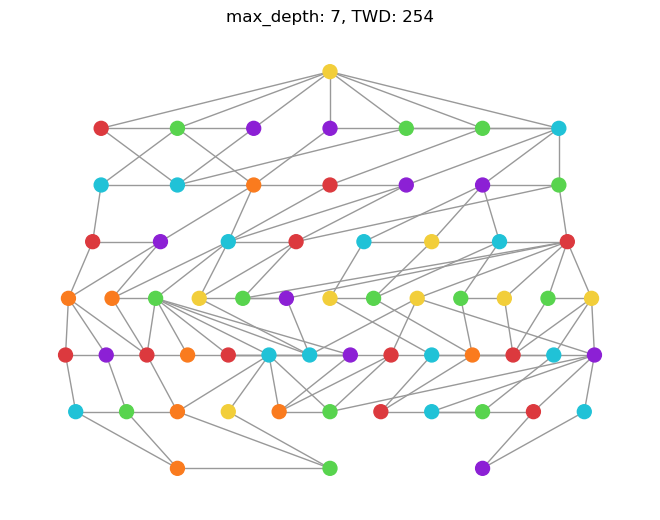

In [8]:
dgd(G, fp, 10, 10)

plt.savefig(r'目录/文件名.png', dpi=200, bbox_inches='tight')

In [46]:
def func(G, fp, seq):
    G1=G.copy()
    steps=np.inf
    counter=0
    G_ls=[]
    
    for i in range(len(seq)+1):
        for node in list(G1._node):
            if node!=fp:
                for neighbor in G1[node]:
                    if (G1._node[node])['color']==(G1._node[neighbor])['color']:
                        target_neighbor=neighbor
                        other_neighbors=list(set(G1[node])-{target_neighbor})
                        
                        for curr_neighbor in other_neighbors:
                            G1.add_edge(curr_neighbor, target_neighbor)
                            
                        G1.remove_node(node)
                        break
                        
        G_ls.append(G1.copy())
        
        if len(G1._node)==1:
            steps=counter
            break
            
        (G1._node[fp])['color']=seq[i] if i<=len(seq)-1 else list(seq)[-1]
        
        counter+=1
        
    return steps, G_ls

In [47]:
steps, G_ls=func(G, fp, ['b', 'p', 'b', 'g', 'r', 'o', 'b', 'g', 'p', 'y', 'b', 'o', 'r', 'p'])

G_ls

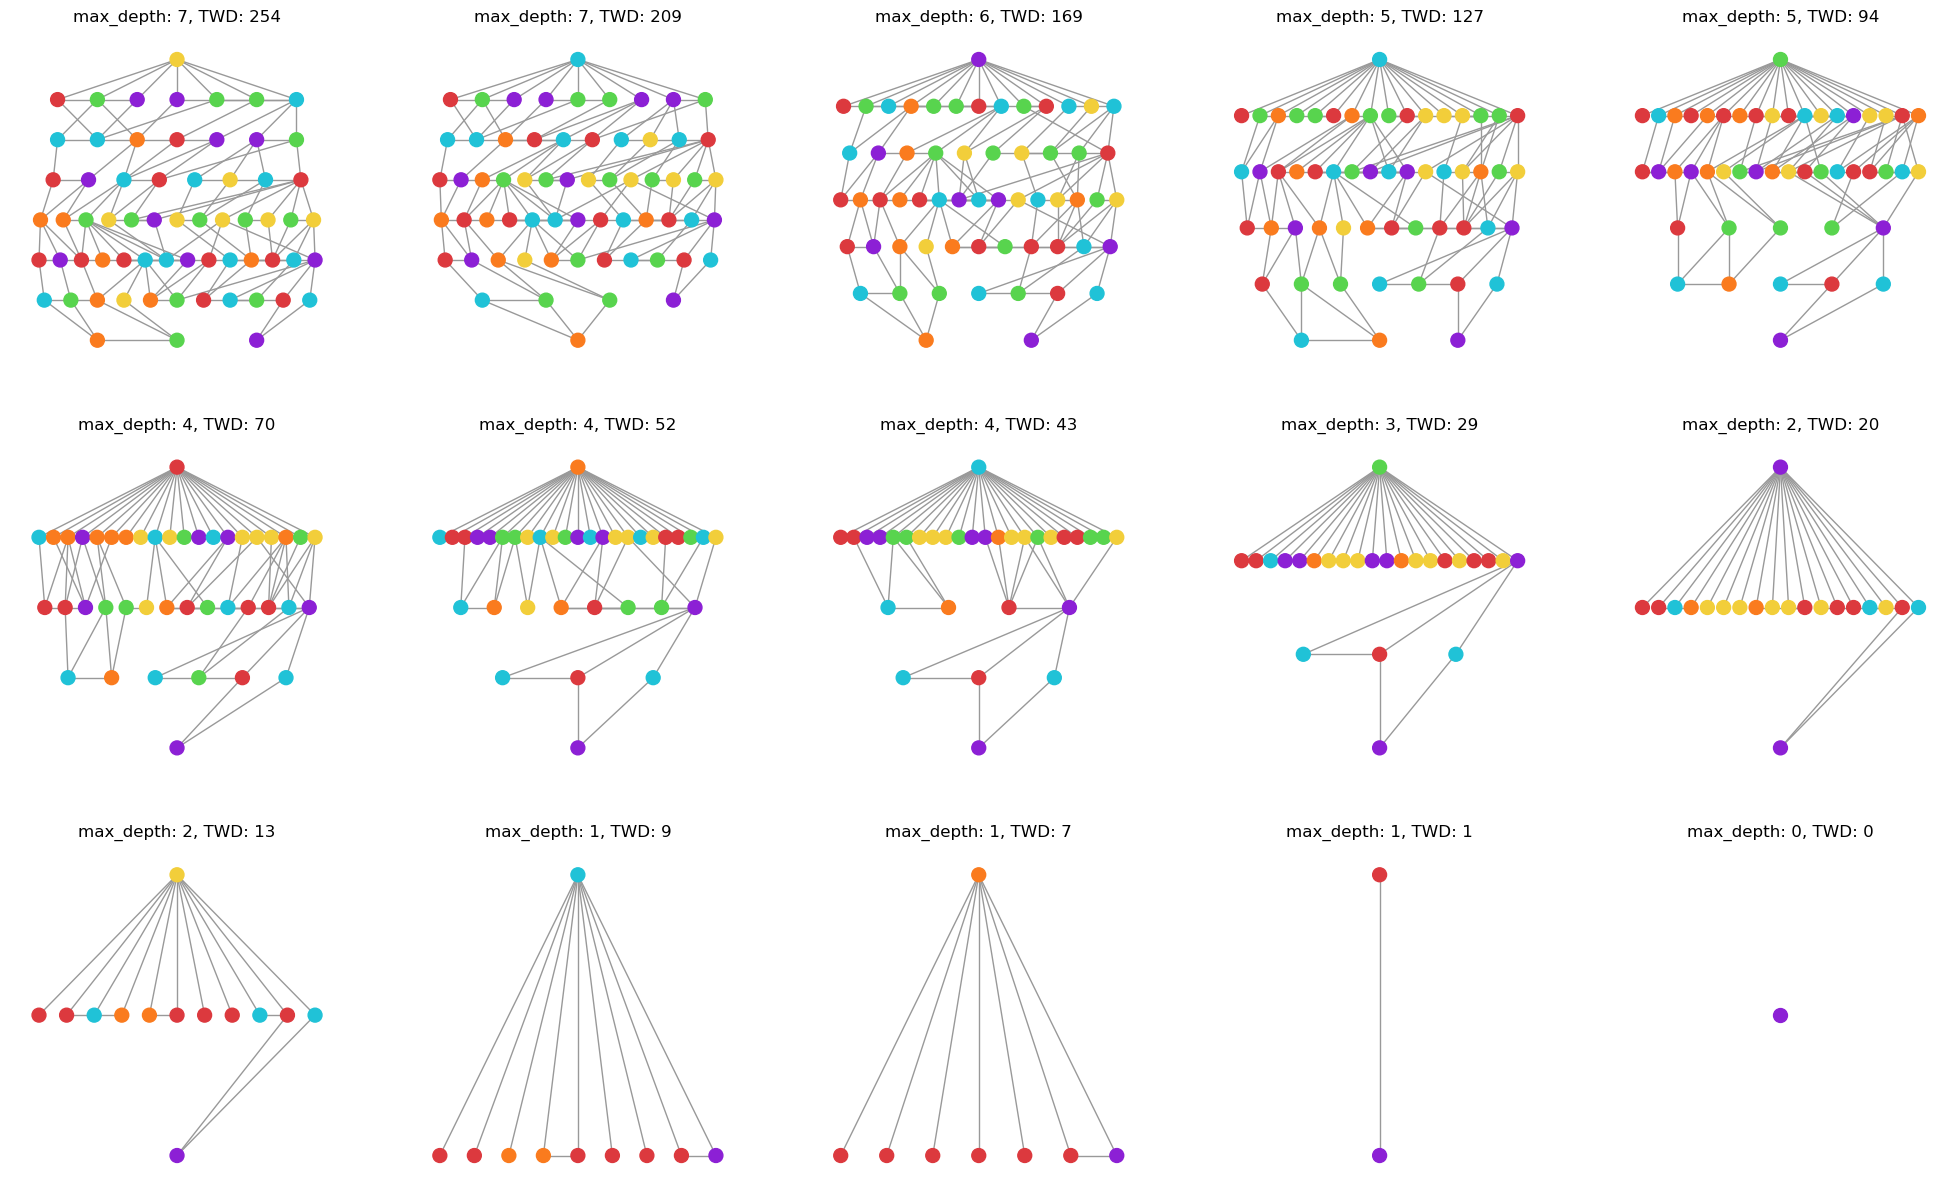

In [48]:
h=5
fig=plt.figure(figsize=(5*h, np.ceil(len(G_ls)/5)*h), facecolor='#f4f4fc')

for i in range(len(G_ls)-1):
    plt.subplot(int(np.ceil(len(G_ls)/5)), 5, i+1)
    dgd(G_ls[i], fp, 5, 5)

plt.subplot(int(np.ceil(len(G_ls)/5)), 5, len(G_ls))
color_map={'r': '#dc393e', 'o': '#fa7b1e', 'y': '#f2ce3a', 'g': '#58d44e', 'b': '#20c2d7', 'p': '#8c20d5'}
nx.draw(G_ls[-1], node_size=100, node_color=color_map[(G_ls[-1]._node[(fp)])['color']])
plt.title('max_depth: {}, TWD: {}'.format(0, 0))
    
# plt.savefig(r'目录/文件名.png', dpi=200, bbox_inches='tight')